## Carichiamo le immagini LDR

Percentuale di informazione mantenuta:
Immagine 1 : 0.9019927083333333
Immagine 2 : 0.9857479166666666
Immagine 3 : 0.9997375


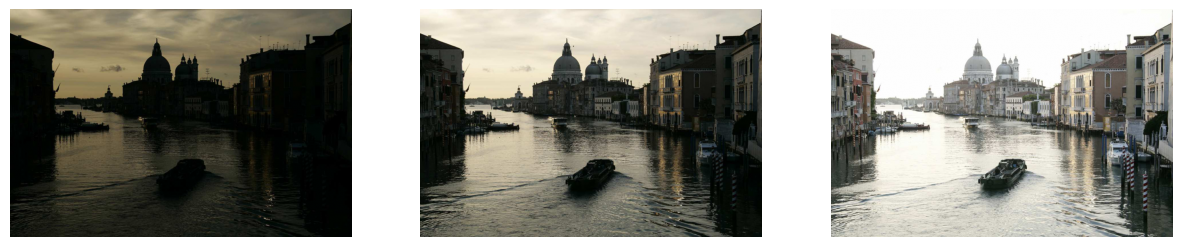

In [57]:
import numpy as np
from PIL import Image
from skimage import img_as_float
import matplotlib.pyplot as plt

DIR_PATH = 'images/1/'

# Carica le immagini e convertile in array NumPy
img1 = img_as_float(np.array(Image.open(f'{DIR_PATH}/image1.jpg').convert('RGB')))
img2 = img_as_float(np.array(Image.open(f'{DIR_PATH}/image2.jpg').convert('RGB')))
img3 = img_as_float(np.array(Image.open(f'{DIR_PATH}/image3.jpg').convert('RGB')))

# Metti le immagini in una lista
images = [img1, img2, img3]

# Visualizza le immagini da fondere
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(images[i])
    ax[i].axis('off')

# Calcola la percentuale di informazione mantenuta
print("Percentuale di informazione mantenuta:")
for i, img in enumerate(images):
    print(f"Immagine {i+1} : {np.count_nonzero(img)/(img.size)}")

## Calcoliamo i pesi delle immagini LDR

Percentuale di informazione mantenuta
Immagine 1: 0.9582177083333333
Immagine 2: 0.997875
Immagine 3: 0.7701541666666667


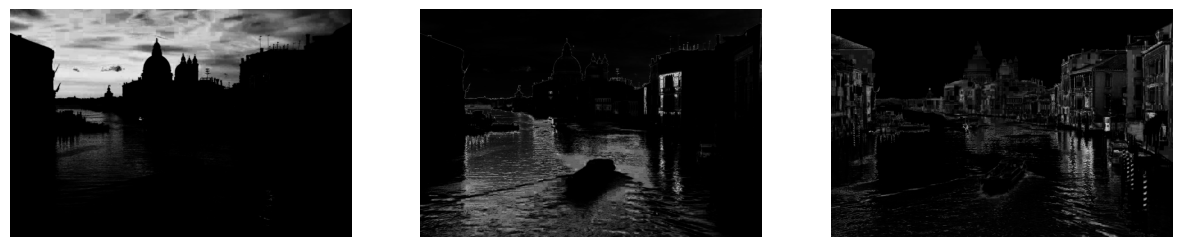

In [58]:
from skimage.color import rgb2gray
# from skimage.filters import laplace, sobel
from scipy.ndimage import gaussian_filter, gaussian_laplace,laplace

def gauss_curve(i,sigma=0.2):
    return np.exp(-(i-0.5)**2/(2*sigma**2))

def calculate_weights(images):
    weights = []
    for img in images:
        # Conversione dell'immagine in scala di grigi
        gray = rgb2gray(img)
        # Calcolo l'indicatore di contrasto applicando il filtro di Laplace sull'immagine in scala di grigi
        # contrast = abs(laplace(gray))
        contrast =abs(gaussian_filter(gray, sigma=1))

        # Saturazione dell'immagine calcolata come deviazione standard dei valori dei pixel
        saturation = np.std(img, axis=2)
        # Esposizione dell'immagine calcolata come prodotto di gaussiane
        well_exposedness = np.prod(gauss_curve(img), axis=2)

        # Definizione dei pesi
        omega_C=1
        omega_S=1
        omega_E=1
        
        # Calcolo della weight map
        weight_mapped =  (saturation ** omega_S) * (well_exposedness ** omega_E) * (contrast ** omega_C)

        weights.append( weight_mapped)
    return weights

weights = calculate_weights(images)

# Visualizza i pesi calcolati
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(weights[i], cmap='gray')
    ax[i].axis('off')

print("Percentuale di informazione mantenuta")
for i in range(3):
    print(f"Immagine {i+1}: {np.count_nonzero(weights[i])/(weights[i].size)}")

### Esempio dei pesi di un'immagine LDR

0.9935604166666666
0.9582177083333333
1.0


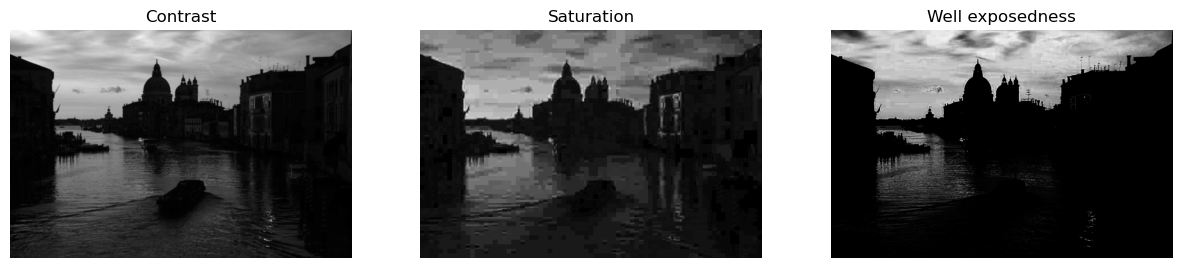

In [59]:
from skimage.filters import sobel



img_contrast = abs(gaussian_filter(rgb2gray(img1),sigma=1))
# Saturazione dell'immagine calcolata come deviazione standard dei valori dei pixel
img_saturation = np.std(img1, axis=2)
# Esposizione dell'immagine calcolata come prodotto di) gaussiane
img_well_exposedness = np.prod(gauss_curve(img_as_float(img1)), axis=2)

# Visualizza i tre indicatori di qualità dell'immagine
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_contrast, cmap='gray')
ax[0].set_title('Contrast')
ax[0].axis('off')
ax[1].imshow(img_saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(img_well_exposedness, cmap='gray')
ax[2].set_title('Well exposedness')
ax[2].axis('off')

print(np.count_nonzero(img_contrast)/(img_contrast.size))
print(np.count_nonzero(img_saturation)/(img_saturation.size))
print(np.count_nonzero(img_well_exposedness)/(img_well_exposedness.size))


## Normalizzazione dei pesi delle immagini LDR

/tmp/ipykernel_6504/3478554546.py:11: RuntimeWarning: invalid value encountered in divide
  normalized_weights = weights / np.sum(weights, axis=0)
/tmp/ipykernel_6504/3478554546.py:6: RuntimeWarning: invalid value encountered in divide
  normalized_weight = img_weight / np.sum(weights,axis=0)


Percentuale di informazione mantenuta
Immagine 1: 0.9582333333333334
Immagine 2: 0.997890625
Immagine 3: 0.7701697916666667


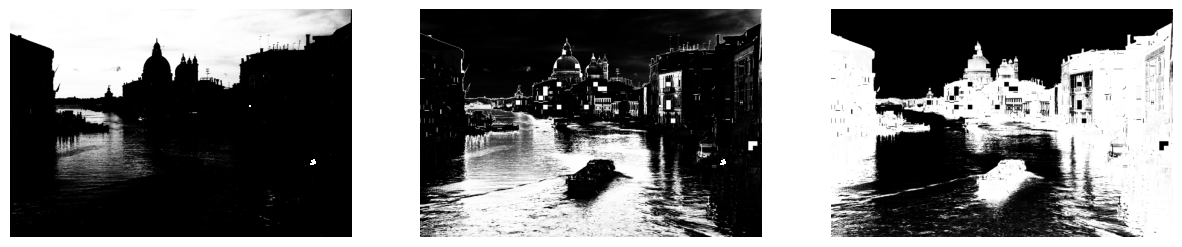

In [60]:
def normalize_weights(weights):
    normalize_weights = []
    # Normalizzazione dei pesi
    for img_weight in weights:
        # Calcolo del peso normalizzato
        normalized_weight = img_weight / np.sum(weights,axis=0)
        normalize_weights.append(normalized_weight)

    return normalize_weights

normalized_weights = weights / np.sum(weights, axis=0)
normalized_weights = normalize_weights(weights)

# Visualizza i pesi normalizzati
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(normalized_weights[i], cmap='gray')
    ax[i].axis('off')

print("Percentuale di informazione mantenuta")
for i in range(3):
    print(f"Immagine {i+1}: {np.count_nonzero(normalized_weights[i])/(normalized_weights[i].size)}")

### Visualizzimo i pesi delle immagini LDR del paper

In [62]:
# Caricare le immagini pesate del paper
mapped_images_paper = [img_as_float(np.array(Image.open(f'{DIR_PATH}/image{i}_mapped.jpg').convert('RGB'))) for i in range(1, 4)]

# Visualizza le immagini pesate del paper
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(mapped_images_paper[i])
    ax[i].axis('off')

FileNotFoundError: [Errno 2] No such file or directory: '/home/angelo/university/exposure_fusion/images/1/image1_mapped.jpg'

### Prova

In [63]:
# Calcoliamo l'immagine risultante R tramite una fusione ponderata delle immagini di input (np.newaxis serve per il canale del colore)
partial_result = np.sum(normalized_weights[:, :, :, np.newaxis] * images, axis=0)

# TODO: capire come fondere le immagini

# Visualizza l'immagine risultante
plt.figure(figsize=(5, 5))
plt.imshow(partial_result)
plt.axis('off')

TypeError: list indices must be integers or slices, not tuple

## Uniamo le immagini insieme ai pesi per creare l'immagine HDR

/tmp/ipykernel_6504/3084331124.py:3: RuntimeWarning: invalid value encountered in divide
  normalized_weights = [w / total_weight for w in weights]
/tmp/ipykernel_6504/3084331124.py:16: RuntimeWarning: invalid value encountered in cast
  fused_image = np.clip(fused_image * 255, 0, 255).astype('uint8')


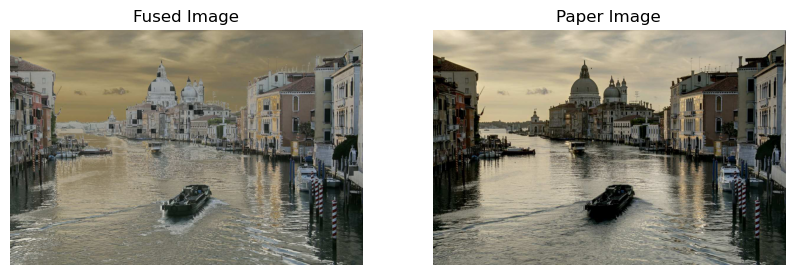

In [64]:
def normalize_weights(weights):
    total_weight = np.sum(weights, axis=0)
    normalized_weights = [w / total_weight for w in weights]
    return normalized_weights

normalized_weights = normalize_weights(weights)

# Inizializza l'immagine risultante
fused_image = np.zeros_like(images[0])

# Calcola la media ponderata
for img, weight in zip(images, normalized_weights):
    fused_image += img * weight[..., np.newaxis]

# Converti l'immagine risultante in formato 8-bit
fused_image = np.clip(fused_image * 255, 0, 255).astype('uint8')

# Salva l'immagine risultante
result_image = Image.fromarray(fused_image)
result_image.save(f'{DIR_PATH}/fused_image.jpg')

# Visualizza l'immagine risultante in confronto all'immagine risultante del paper
paper_image = Image.open(f'{DIR_PATH}/result.jpg')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(result_image)
ax[0].axis('off')
ax[0].set_title('Fused Image')
ax[1].imshow(paper_image)
ax[1].axis('off')
ax[1].set_title('Paper Image')
plt.show()

